In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer #fills in missing values 
from sklearn.linear_model import LinearRegression
#impute
from sklearn.impute import SimpleImputer #fills in missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
import pylab as pl
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, make_union, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import pandas as pd

from matplotlib import pyplot as plt

#load

df = pd.read_csv('data.csv') 
df.head()

#toal income 
df['TotalIncome'] = df['ApplicantIncome']+df['CoapplicantIncome']
y = df['Loan_Status']
X = df.drop('Loan_Status',axis=1)
print(df.head())

import sklearn.model_selection as model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.70,test_size=0.30, random_state=101)


from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.compose import make_column_selector, make_column_transformer, ColumnTransformer
from sklearn.pipeline import make_pipeline, make_union, FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Use the ColumnTransformer to apply the transformations to the correct columns in the dataframe.
# integer_features = list(X.columns[X.dtypes == 'int64'])
# continuous_features = list(X.columns[X.dtypes == 'float64'])
# categorical_features = list(X.columns[X.dtypes == 'object'])

nominal_variables = list(X.select_dtypes(exclude = ['number']))
numeric_variables = list(X.select_dtypes(include = ['number']))

scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

impute_dnd = SimpleImputer(strategy='constant',fill_value='dnd')
impute_numeric = SimpleImputer(strategy='median')

#Features=list_of_features.drop(['Loan_ID','Loan_Status_N'])

preprocess = make_column_transformer(
    (make_pipeline(impute_dnd,ohe),nominal_variables),
    (make_pipeline(impute_numeric, scaler), numeric_variables),
    remainder="passthrough"
)
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
# create a pipeline
#pipe = make_pipeline(preprocess, GaussianNB())

pipe = make_pipeline(preprocess, LogisticRegression())

from sklearn.model_selection import cross_val_score
# cross-validate the pipeline
print(cross_val_score(pipe, X, y).mean())

# fit the pipeline and make predictions
# X_train, X_test, y_train, y_test
pipe.fit(X_train, y_train)

pipe.predict(X)

import joblib
joblib.dump(pipe, "pipe.joblib")

#load pipeline
model = joblib.load('pipe.joblib')



#you are here 
# set up our parameters grid
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

logisticregression=LogisticRegression()
param_grid = [
    {'logisticregression' : [logisticregression],
     'logisticregression__penalty' : ['l1', 'l2'],
    'logisticregression__C' : np.logspace(-4, 4, 20),
    'logisticregression__solver' : ['liblinear']}]
#     # {'RandomForestClassifier' : [RandomForestClassifier()],
#     # 'RandomForestClassifier__n_estimators' : list(range(10,101,10)),
#     # 'RandomForestClassifier__max_features' : list(range(6,32,5))}

# if we want sequence multiple model.classes_https://www.kdnuggets.com/2018/01/managing-machine-learning-workflows-scikit-learn-pipelines-part-3.html
#https://www.codegrepper.com/code-examples/whatever/gridsearchcv+multiple+estimators
#https://www.davidsbatista.net/blog/2018/02/23/model_optimization/

# create a Grid Search object
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
# fit the model and tune parameters



grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print("\n\n=======score=======")
print(grid_search.score)
print("\n\n=======Best score=======")
print(grid_search.best_score_)


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  TotalIncome  
0             1.0         Urban           Y       5849.0  
1             1.0         Rural         

No handles with labels found to put in legend.


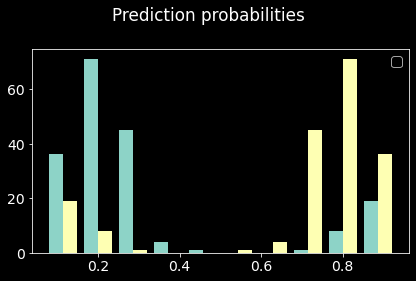

In [62]:

y_test_predict_proba = grid_search.predict_proba(X_test) # remove the slice to have ALL predictions 
fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs.hist(y_test_predict_proba, bins=10)
fig.patch.set_facecolor('black')
axs.set_facecolor('black')
fig.suptitle("Prediction probabilities")
axs.legend()
plt.show()


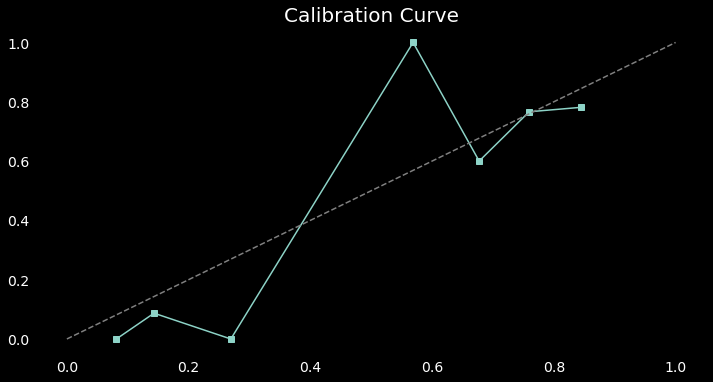

In [52]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import seaborn as sns
fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_test_predict_proba, n_bins=10)

fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(mean_predicted_value, fraction_of_positives, 's-')
plt.plot([0, 1], [0, 1], '--', color='gray')

sns.despine(left=True, bottom=True)
plt.gca().xaxis.set_ticks_position('none')
plt.gca().yaxis.set_ticks_position('none')
plt.title("Calibration Curve", fontsize=20); pass

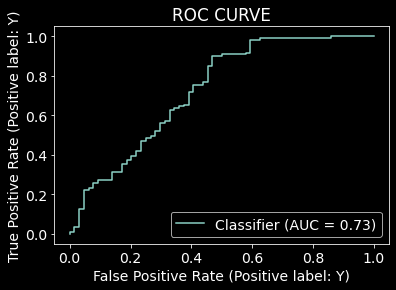

In [54]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import RocCurveDisplay
import matplotlib

def roc_curve_and_score(y_test, pred_proba):
    fpr, tpr, _ = roc_curve(y_test.ravel(), pred_proba.ravel())
    roc_auc = roc_auc_score(y_test.ravel(), pred_proba.ravel())
    return fpr, tpr, roc_auc

RocCurveDisplay.from_predictions(y_test, y_test_predict_proba,pos_label='Y')
plt.title("ROC CURVE")
plt.show()
